In [8]:
import numpy  as np 
import pandas as pd

In [7]:
ham_veri=pd.read_csv("water_potability.csv")

In [9]:
ham_veri[["Sulfate","ph"]].mean()

Sulfate    333.775777
ph           7.080795
dtype: float64

In [10]:
ham_veri.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
# ham_veri sabit kalacak şekilde yeni bir veri değişkenine değerleri aktaralım

veri = ham_veri.copy()

In [12]:
# veri içinde boş değer olan satırları siliyorum
veri = veri.dropna(axis=0)
veri.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


<AxesSubplot:xlabel='Potability', ylabel='count'>

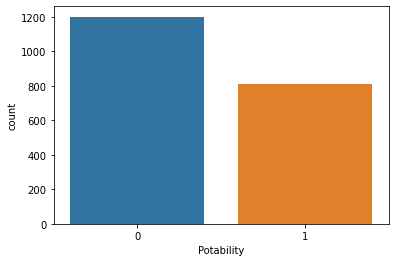

In [13]:
import seaborn as sns

sns.countplot(x=veri["Potability"],)


In [33]:
# veriyi numpy ndarray yapısına çevirelim.
# bu aşamada öznitelikler X, hedef/sınıf y değişkenine ndarray aktaralım
print(type(veri))
X=veri.iloc[:,0:-1].values# son sütun hariç bütün sütunlar ve satırlar
# print(X)
y=veri.iloc[:,-1].values # son sütunun bütün satırları
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
# elde ettiğimiz X öznitelik değerlerini 0-1 arasına normalize edelim
# bazı ml algoirtmaları verilerin 0-1 arasına normalize edilmesini ister
# bu işlemi sklearn minmax_scale fonksiyonu ile yapabiliriz.
from sklearn.preprocessing import minmax_scale

Xn = minmax_scale(X,feature_range=(0,1))
Xn


array([[0.58734916, 0.57774671, 0.38629788, ..., 0.65452157, 0.79502934,
        0.63011476],
       [0.64365393, 0.44130035, 0.31438058, ..., 0.37724796, 0.20291434,
        0.52035803],
       [0.38893354, 0.47087564, 0.50612238, ..., 0.24992171, 0.40148717,
        0.21997295],
       ...,
       [0.81782618, 0.08743355, 0.65638906, ..., 0.56326524, 0.28574454,
        0.5786739 ],
       [0.42418706, 0.4640915 , 0.45965606, ..., 0.39778031, 0.44915584,
        0.44000443],
       [0.32242529, 0.49289123, 0.84140928, ..., 0.47142165, 0.50345848,
        0.59186714]])

In [35]:
X

array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, ...,
        1.84365245e+01, 1.00341674e+02, 4.62877054e+00],
       [9.09222346e+00, 1.81101509e+02, 1.79789863e+04, ...,
        1.15582794e+01, 3.19979927e+01, 4.07507543e+00],
       [5.58408664e+00, 1.88313324e+02, 2.87486877e+04, ...,
        8.39973464e+00, 5.49178618e+01, 2.55970823e+00],
       ...,
       [1.14910109e+01, 9.48125452e+01, 3.71888260e+04, ...,
        1.61727554e+01, 4.15585007e+01, 4.36926431e+00],
       [6.06961576e+00, 1.86659040e+02, 2.61387802e+04, ...,
        1.20676196e+01, 6.04199211e+01, 3.66971170e+00],
       [4.66810169e+00, 1.93681735e+02, 4.75809916e+04, ...,
        1.38944185e+01, 6.66876948e+01, 4.43582091e+00]])

In [36]:
from sklearn.model_selection import train_test_split
# train test split, verilerizi eğitim ve test verisi olarak bölütlememizi sağlar
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=22)
Xn_train,Xn_test,yn_train,yn_test=train_test_split(X,y,test_size=0.2, random_state=22)

In [42]:
# destek vektör makineleri ile eğitim yapalım
from sklearn.svm import  SVC

dvm = SVC()# destek vektör makine sınıfından bir örnek oluşturuldu.
dvm.fit(X_train,y_train)# eğtim verileri ile dvm eğitildi
skor = dvm.score(X_test,y_test)
print(skor)


0.5955334987593052


In [45]:
dvm_n = SVC()
dvm_n.fit(Xn_train,yn_train)

skor_n = dvm_n.score(Xn_test,yn_test)
print(skor_n)


0.5955334987593052


In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)

skor_dt = dt.score(X_test,y_test)
print(skor_dt)

0.5856079404466501


In [49]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
skor_knn=knn.score(X_test,y_test)
print(skor_knn)

0.5235732009925558


In [50]:
from sklearn.linear_model import  LogisticRegression

lr= LogisticRegression()
lr.fit(X_train,y_train)
skor_lr=lr.score(X_test,y_test)
print(skor_lr)

0.5955334987593052
